In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py

from IPython.display import display
from sklearn import preprocessing
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
hfi_df = pd.read_csv('hfi_cc_2018.csv')

In [3]:
def impute_ranked(df, cols, ranks):
    ''' A function to impute null values in a data frame based on a ranked column
    :param df: df, a pandas dataframe with null values for scores that correspond to a rank
    :param cols: array-like, a list or array containing the columns for which to impute nulls
    :param ranks: str, the column name wherein ranks are found
    '''
    df['pct_off_mean'] = (df[ranks].max() - df[ranks]) / df[ranks].mean()
    for col in cols:
        df[col].fillna(np.nanmean(df[col])*df['pct_off_mean'], inplace=True)
    return df

In [4]:
pf_cols = list(hfi_df.columns[4:61])
ef_cols = list(hfi_df.columns[64:-6])

hf_df = impute_ranked(hfi_df, pf_cols, 'pf_rank')
hf_df = impute_ranked(hfi_df, ef_cols, 'ef_rank')

In [5]:
hf16_df = hf_df.iloc[:162]

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



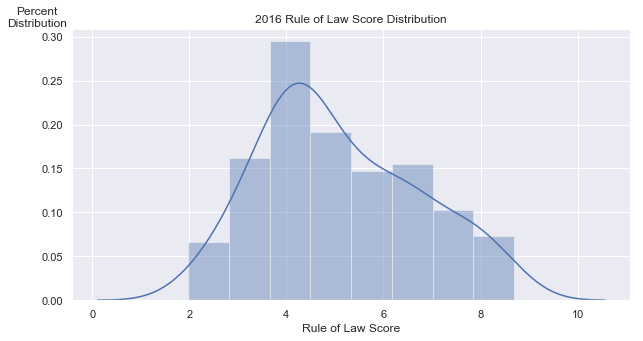

In [6]:
sns.set()
plt.figure(figsize=(10, 5))
ax = sns.distplot(hf16_df['pf_rol'])
ax.set_ylabel('Percent\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_xlabel('Rule of Law Score')
ax.set_title('2016 Rule of Law Score Distribution')
plt.show()

## Pros:
- clear distribution approximation and distibution by bins
- clean look, uncluttered

## Cons:
- no idea of specific values or distribution within bins
- no delineation of quartiles and outliers

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



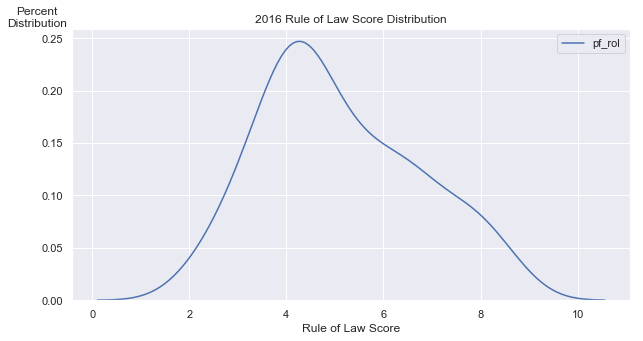

In [7]:
plt.figure(figsize=(10, 5))
ax = sns.kdeplot(hf16_df['pf_rol'])
ax.set_ylabel('Percent\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_xlabel('Rule of Law Score')
ax.set_title('2016 Rule of Law Score Distribution')
plt.show()

## Pros:
- clear distribution approximation
- clean look, uncluttered

## Cons:
- no idea of specific values or actual distribution by bins
- no delineation of quartiles and outliers

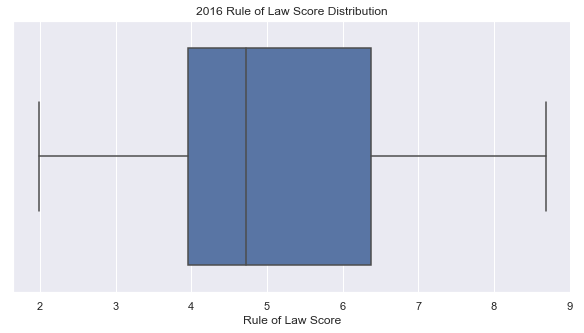

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(hf16_df['pf_rol'])
ax.set_xlabel('Rule of Law Score')
ax.set_title('2016 Rule of Law Score Distribution')
plt.show()

## Pros:
- clear look at quartile ranges and mean
- clean look, uncluttered

## Cons:
- no binned counts or distributions

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



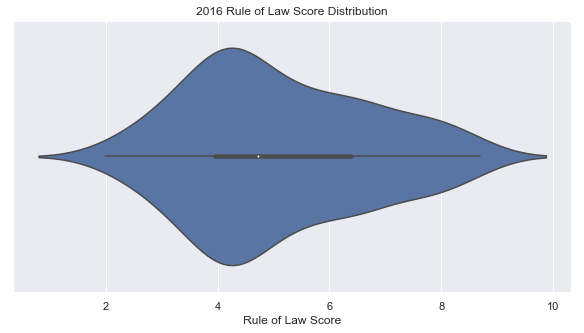

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.violinplot(hf16_df['pf_rol'])
ax.set_xlabel('Rule of Law Score')
ax.set_title('2016 Rule of Law Score Distribution')
plt.show()

## Pros:
- clear range and visualization of distribution
- specific points plotted, mean highlighted

## Cons:
- cluttered
- no delineation of quartiles and outliers

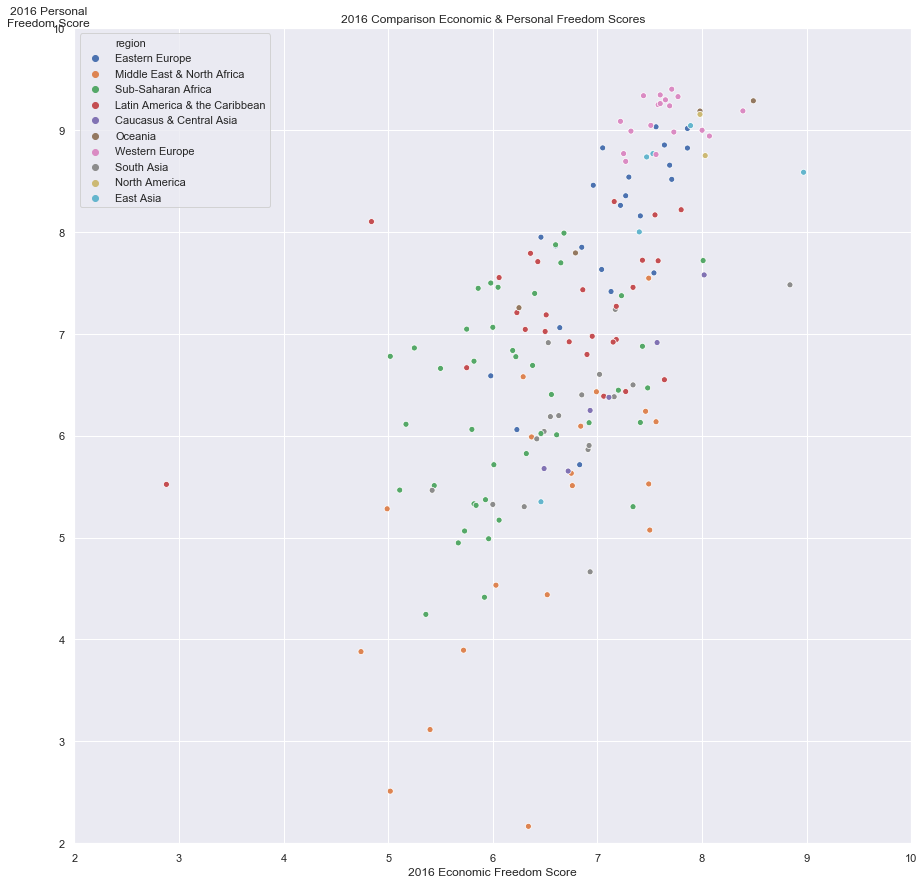

In [10]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(hf16_df['ef_score'], hf16_df['pf_score'], hue=hf16_df['region'], legend='full')
ax.set_xlabel('2016 Economic Freedom Score')
ax.set_ylabel('2016 Personal\nFreedom Score', rotation=0, position=(1.0, 1.0))
ax.set_xlim(2,10)
ax.set_ylim(2,10)
ax.set_title('2016 Comparison Economic & Personal Freedom Scores')
plt.show()

## Pros:
- all points visible
- grouped by color

## Cons:
- cluttered
- no visualization of trends or normal ranges

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



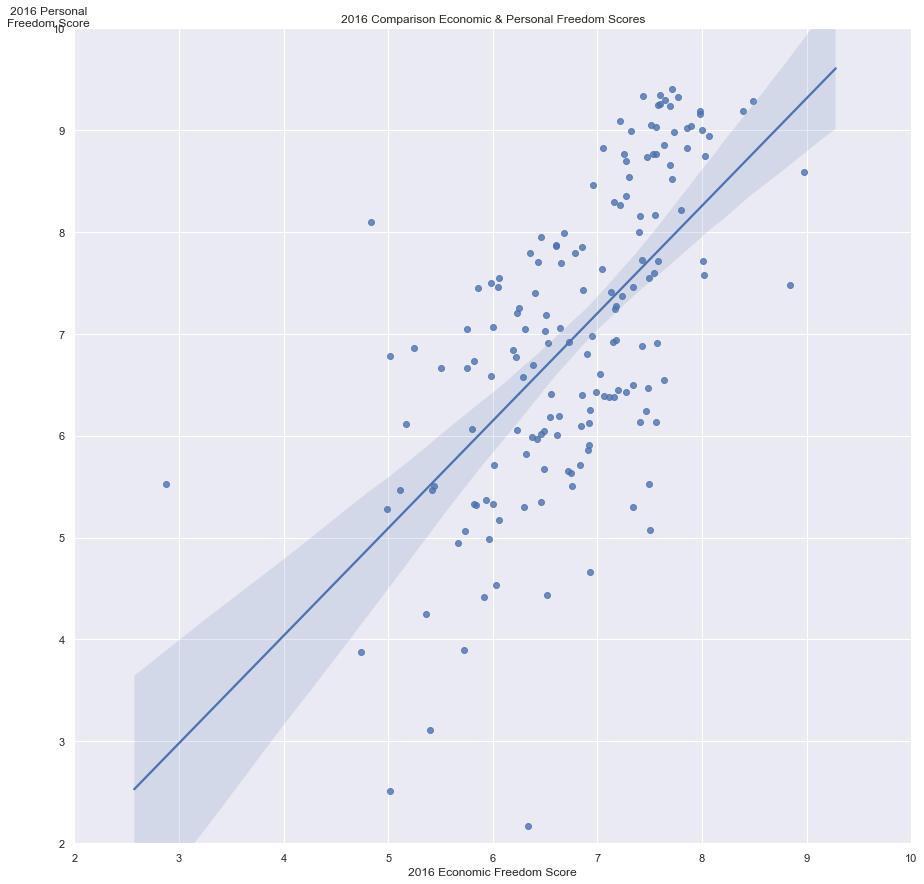

In [11]:
plt.figure(figsize=(15,15))
ax = sns.regplot(hf16_df['ef_score'], hf16_df['pf_score'])
ax.set_xlabel('2016 Economic Freedom Score')
ax.set_ylabel('2016 Personal\nFreedom Score', rotation=0, position=(1.0, 1.0))
ax.set_xlim(2,10)
ax.set_ylim(2,10)
ax.set_title('2016 Comparison Economic & Personal Freedom Scores')
plt.show()

## Pros:
- all points visible
- linear regression for trend

## Cons:
- cluttered
- no visual grouping for context

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



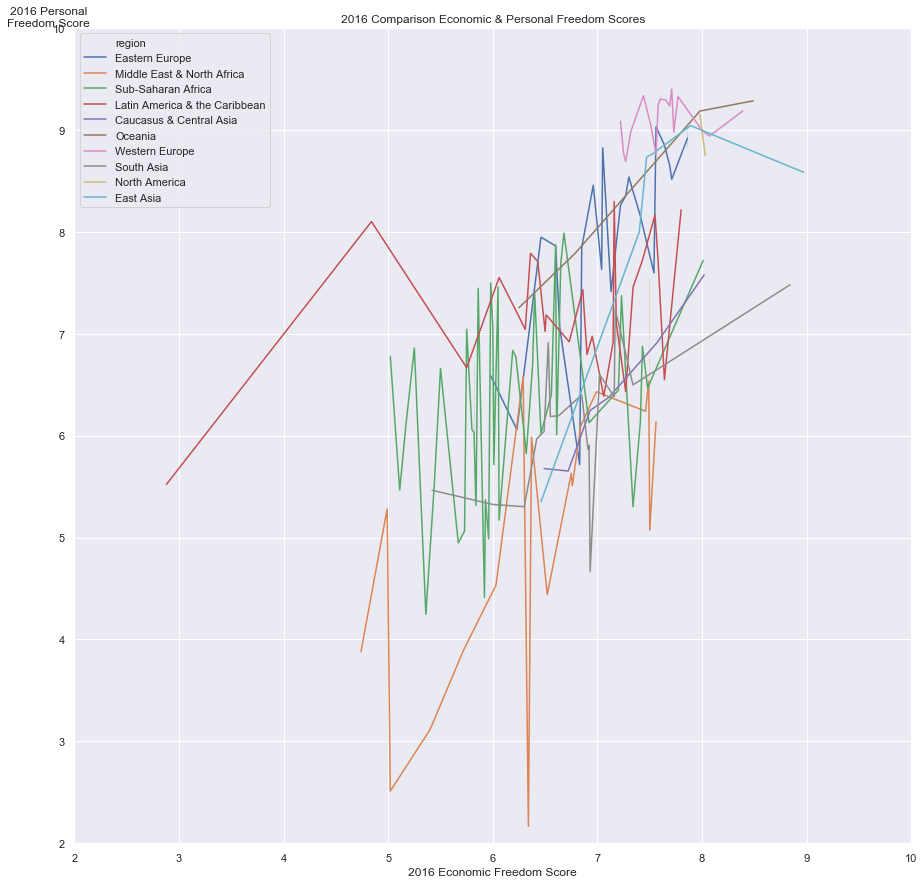

In [12]:
plt.figure(figsize=(15,15))
ax = sns.lineplot(hf16_df['ef_score'], hf16_df['pf_score'], hue=hf16_df['region'], style=hf16_df['region'],
                  dashes=False, legend='full')
ax.set_xlabel('2016 Economic Freedom Score')
ax.set_ylabel('2016 Personal\nFreedom Score', rotation=0, position=(1.0, 1.0))
ax.set_xlim(2,10)
ax.set_ylim(2,10)
ax.set_title('2016 Comparison Economic & Personal Freedom Scores')
plt.show()

## Pros:
- grouped by color/line
- highlights variance within group

## Cons:
- cluttered
- no specific points

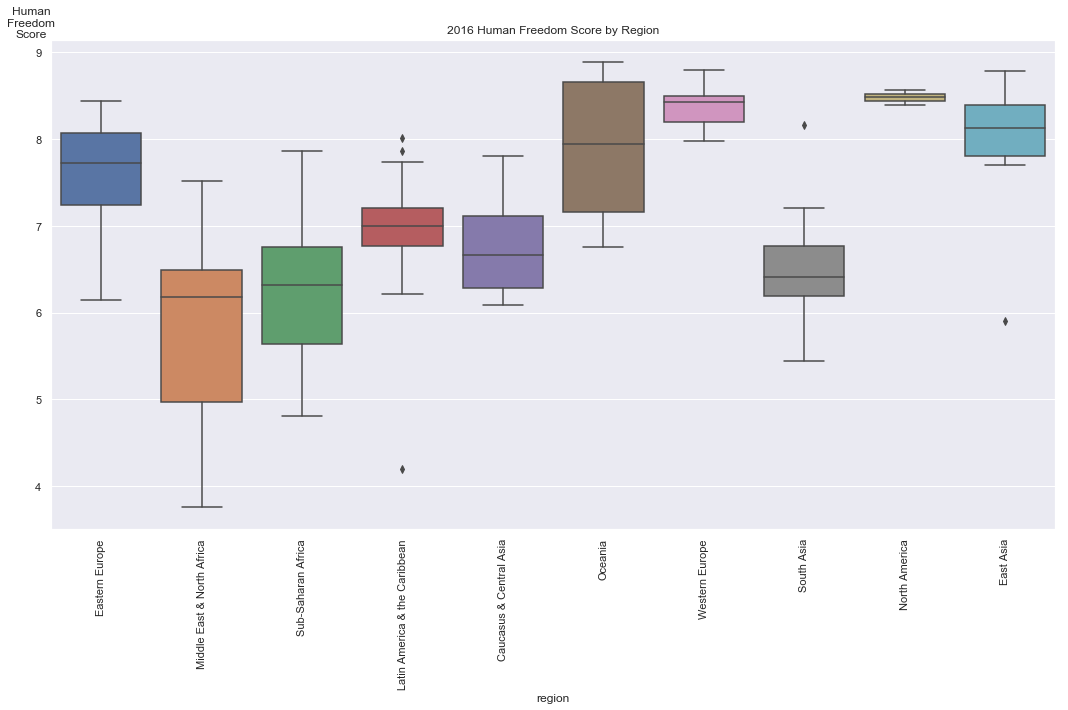

In [13]:
plt.figure(figsize=(18,9))
ax = sns.boxplot(hf16_df['region'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('2016 Human Freedom Score by Region')
plt.show()

## Pros:
- grouped by color/box
- highlights variance, mean, outliers within group

## Cons:
- few specific points
- cluttered for sparse data (see North America)

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



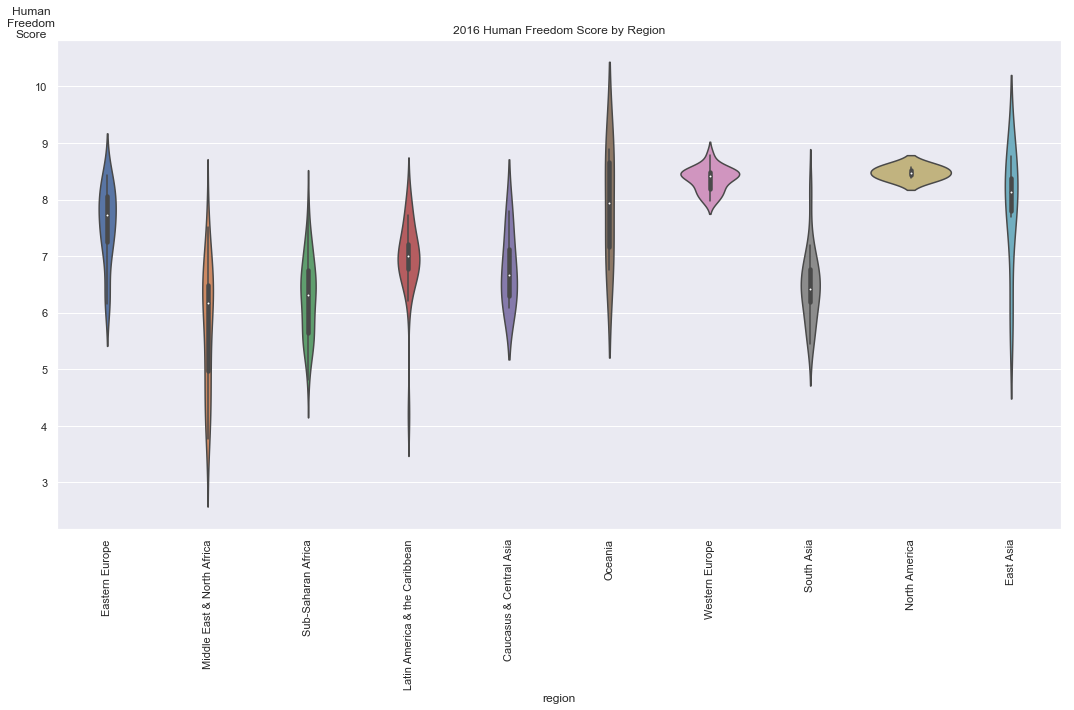

In [14]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(hf16_df['region'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('2016 Human Freedom Score by Region')
plt.show()

## Pros:
- grouped by color/violin
- highlights variance, mean, specific points within group

## Cons:
- cluttered for large data

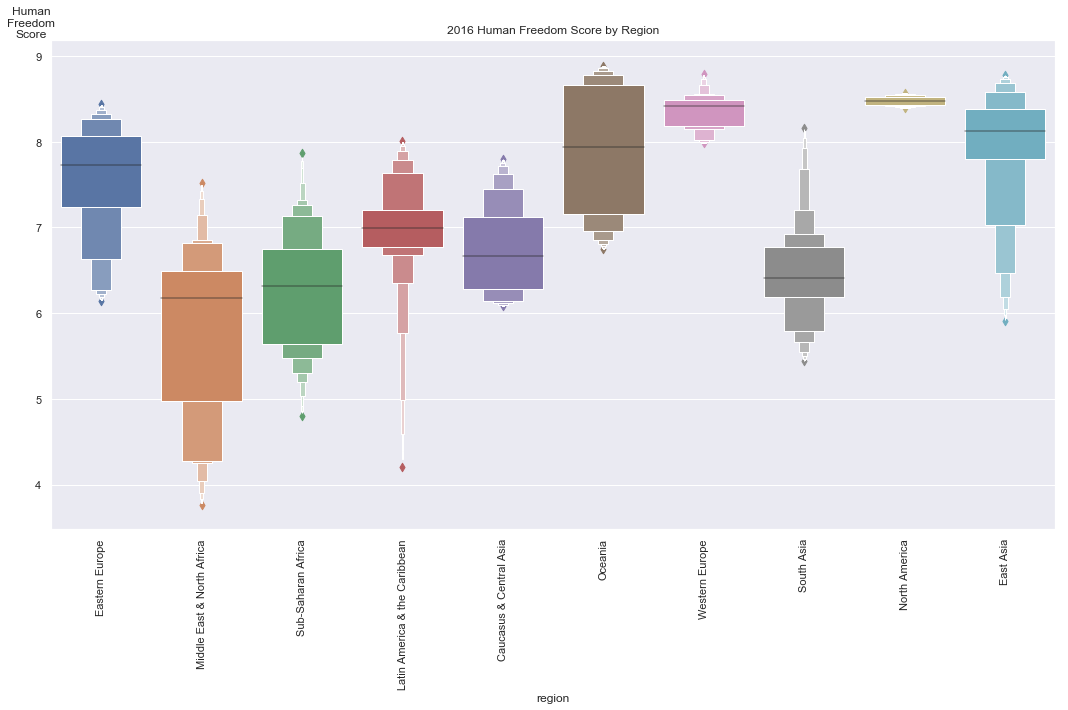

In [15]:
plt.figure(figsize=(18,9))
ax = sns.boxenplot(hf16_df['region'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('2016 Human Freedom Score by Region')
plt.show()

## Pros:
- grouped by color/box
- highlights variance, mean, distribution, outliers within group

## Cons:
- few specific points
- cluttered for sparse data (see North America)

In [16]:
plotly.tools.set_credentials_file(username='tjeffkessler', api_key='oNf5ypNShAYEIzCOCvk6')

#code adapted from plotly choropleth world map example
#x = hf_df.iloc[:161, 4:].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#hf_df.iloc[:161, 4:] = pd.DataFrame(x_scaled)

data = [ dict(
        type = 'choropleth',
        locations = hf16_df['ISO_code'],
        z = hf16_df['hf_score'],
        text = hf16_df['countries'],
        colorscale = [[3,"rgb(5, 10, 172)"],[4.5,"rgb(40, 60, 190)"],[6,"rgb(70, 100, 245)"],\
            [7.5,"rgb(90, 120, 245)"],[9,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            title = 'Human Freedom Score'),
      ) ]

layout = dict(
    title = '2016 Human Freedom Index by Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='hfscore-world-map' )

## Pros:
- gives context through recgonizable map
- highlights variance with thermometer style color range
- values available with mouse hover

## Cons:
- no clear visual of distribution or quartile ranges

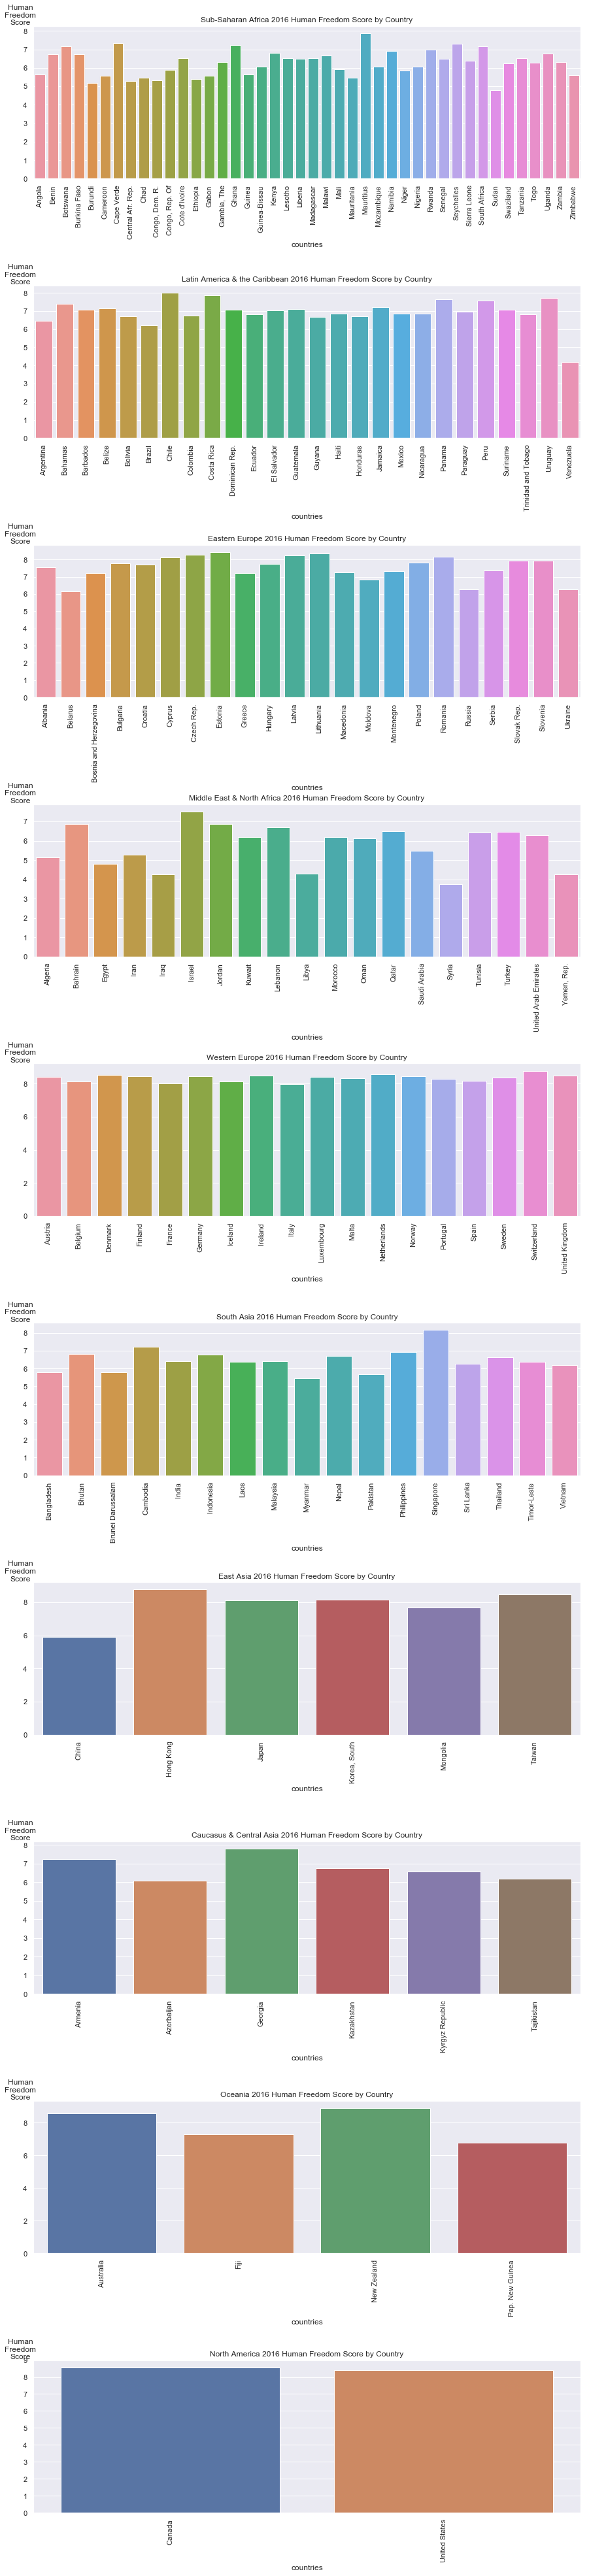

In [17]:
fig = plt.figure(figsize=(15,70))

fig.subplots_adjust(hspace=0.7)

plt.subplot(10, 1, 1)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Sub-Saharan Africa'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Sub-Saharan Africa 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 2)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Latin America & the Caribbean'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Latin America & the Caribbean 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 3)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Eastern Europe'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Eastern Europe 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 4)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Middle East & North Africa'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Middle East & North Africa 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 5)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Western Europe'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Western Europe 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 6)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'South Asia'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('South Asia 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 7)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'East Asia'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('East Asia 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 8)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Caucasus & Central Asia'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Caucasus & Central Asia 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 9)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'Oceania'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Oceania 2016 Human Freedom Score by Country')

plt.subplot(10, 1, 10)
ax = sns.barplot(hf16_df['countries'].loc[hf16_df['region'] == 'North America'], hf16_df['hf_score'])
ax.set_ylabel('Human\nFreedom\nScore', rotation=0, position=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('North America 2016 Human Freedom Score by Country')
plt.show()

## Pros:
- grouped by subplot
- highlights variance within group

## Cons:
- some plots are more cluttered than others, cannot plot side-by-side, cannot use same palette
- space at the bottom of the y range wasted in all plot

C:\Users\Jeff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



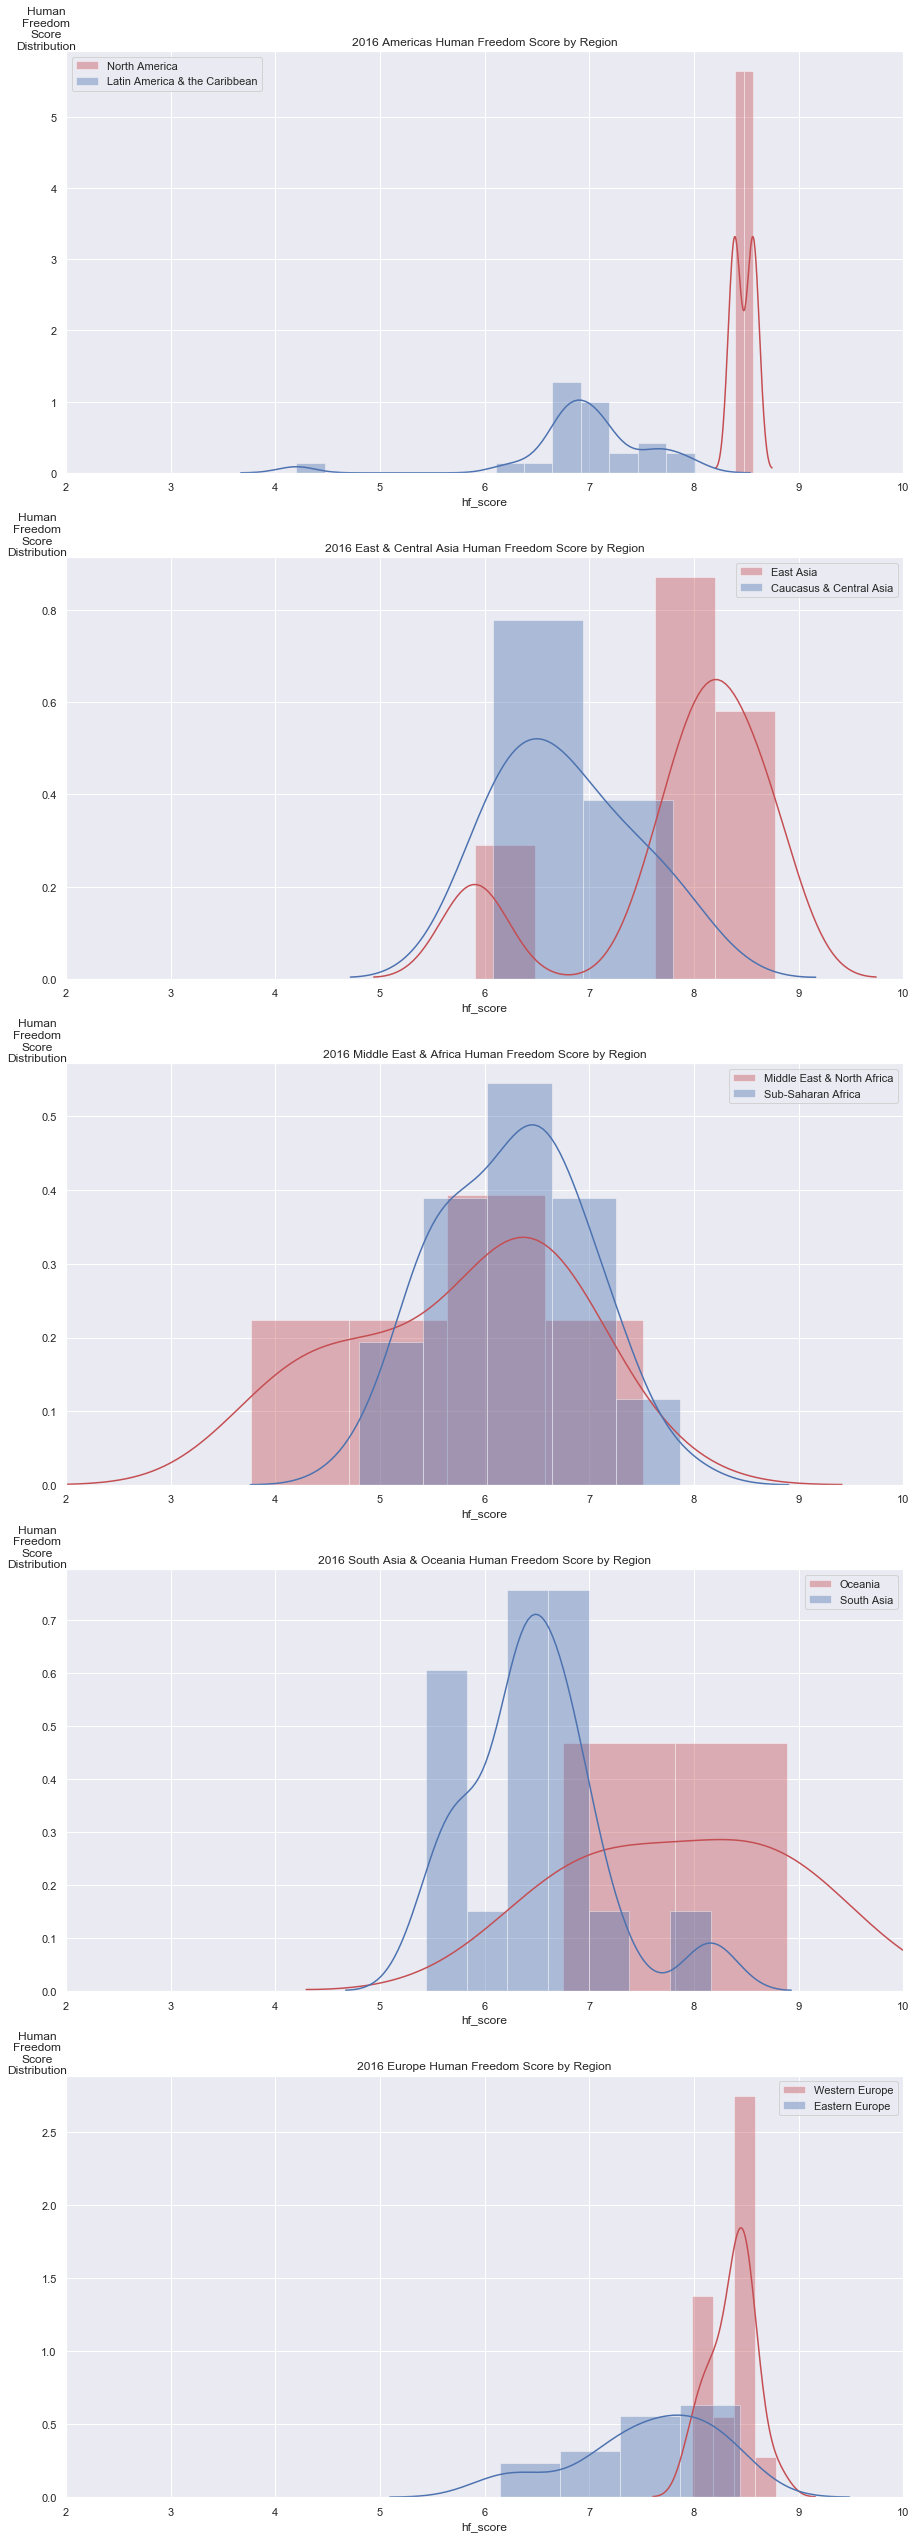

In [18]:
plt.figure(figsize=(15, 45))

plt.subplot(5, 1, 1)
ax = sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'North America'], color='r', label='North America')
sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Latin America & the Caribbean'], color='b', label='Latin America & the Caribbean')
ax.set_xlim(2, 10)
ax.legend()
ax.set_ylabel('Human\nFreedom\nScore\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_title('2016 Americas Human Freedom Score by Region')

plt.subplot(5, 1, 2)
ax = sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'East Asia'], color='r', label='East Asia')
sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Caucasus & Central Asia'], color='b', label='Caucasus & Central Asia')
ax.set_xlim(2, 10)
ax.legend()
ax.set_ylabel('Human\nFreedom\nScore\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_title('2016 East & Central Asia Human Freedom Score by Region')

plt.subplot(5, 1, 3)
ax = sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Middle East & North Africa'], color='r', label='Middle East & North Africa')
sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Sub-Saharan Africa'], color='b', label='Sub-Saharan Africa')
ax.set_xlim(2, 10)
ax.legend()
ax.set_ylabel('Human\nFreedom\nScore\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_title('2016 Middle East & Africa Human Freedom Score by Region')

plt.subplot(5, 1, 4)
ax = sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Oceania'], color='r', label='Oceania')
sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'South Asia'], color='b', label='South Asia')
ax.set_xlim(2, 10)
ax.legend()
ax.set_ylabel('Human\nFreedom\nScore\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_title('2016 South Asia & Oceania Human Freedom Score by Region')

plt.subplot(5, 1, 5)
ax = sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Western Europe'], color='r', label='Western Europe')
sns.distplot(hf16_df['hf_score'].loc[hf16_df['region'] == 'Eastern Europe'], color='b', label='Eastern Europe')
ax.set_xlim(2, 10)
ax.legend()
ax.set_ylabel('Human\nFreedom\nScore\nDistribution', rotation=0, position=(1.0, 1.0))
ax.set_title('2016 Europe Human Freedom Score by Region')
plt.show()

## Pros:
- grouped by subplot
- highlights distribution within group

## Cons:
- distributions are based on different counts
- no information about specific values